# Import Library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect Data

In [49]:
train_data = pd.read_csv("Well A.csv")
train_data.head()

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FACIES
0,734.419199,12.787381,NaN,1.407795,1.472684,NaN,118.992989,NaN,NaN,154.404816,NaN,9.875,26.911829,NaN,1
1,734.571200,12.790987,NaN,1.394810,1.464091,NaN,124.514305,NaN,NaN,154.974701,NaN,9.875,26.133530,NaN,1
2,734.723199,12.801331,NaN,1.377496,1.434632,NaN,126.779854,NaN,NaN,155.762970,NaN,9.875,27.482636,NaN,1
3,734.875200,12.628396,NaN,1.369218,1.419665,NaN,127.186066,NaN,NaN,156.187897,NaN,9.875,28.694523,NaN,1
4,735.027200,12.528492,NaN,1.373198,1.427742,NaN,125.184708,NaN,NaN,157.038986,NaN,9.875,28.981676,NaN,1


In [50]:
train_data.shape

(10708, 15)

In [51]:
train_data.columns

Index(['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DRHO', 'FACIES'],
      dtype='object')

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10708 entries, 0 to 10707
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH_MD  10708 non-null  float64
 1   CALI      10708 non-null  float64
 2   RSHA      0 non-null      float64
 3   RMED      10675 non-null  float64
 4   RDEP      10699 non-null  float64
 5   RHOB      10396 non-null  float64
 6   GR        10708 non-null  float64
 7   NPHI      10565 non-null  float64
 8   PEF       10396 non-null  float64
 9   DTC       10643 non-null  float64
 10  SP        0 non-null      float64
 11  BS        10708 non-null  float64
 12  ROP       10708 non-null  float64
 13  DRHO      10472 non-null  float64
 14  FACIES    10708 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


In [53]:
train_data.FACIES.value_counts()

1    5237
2    1808
4    1796
6    1148
3     572
5     147
Name: FACIES, dtype: int64

In [54]:
labels = train_data["FACIES"].value_counts().to_dict()

# Data cleaning and preparation

<Axes: >

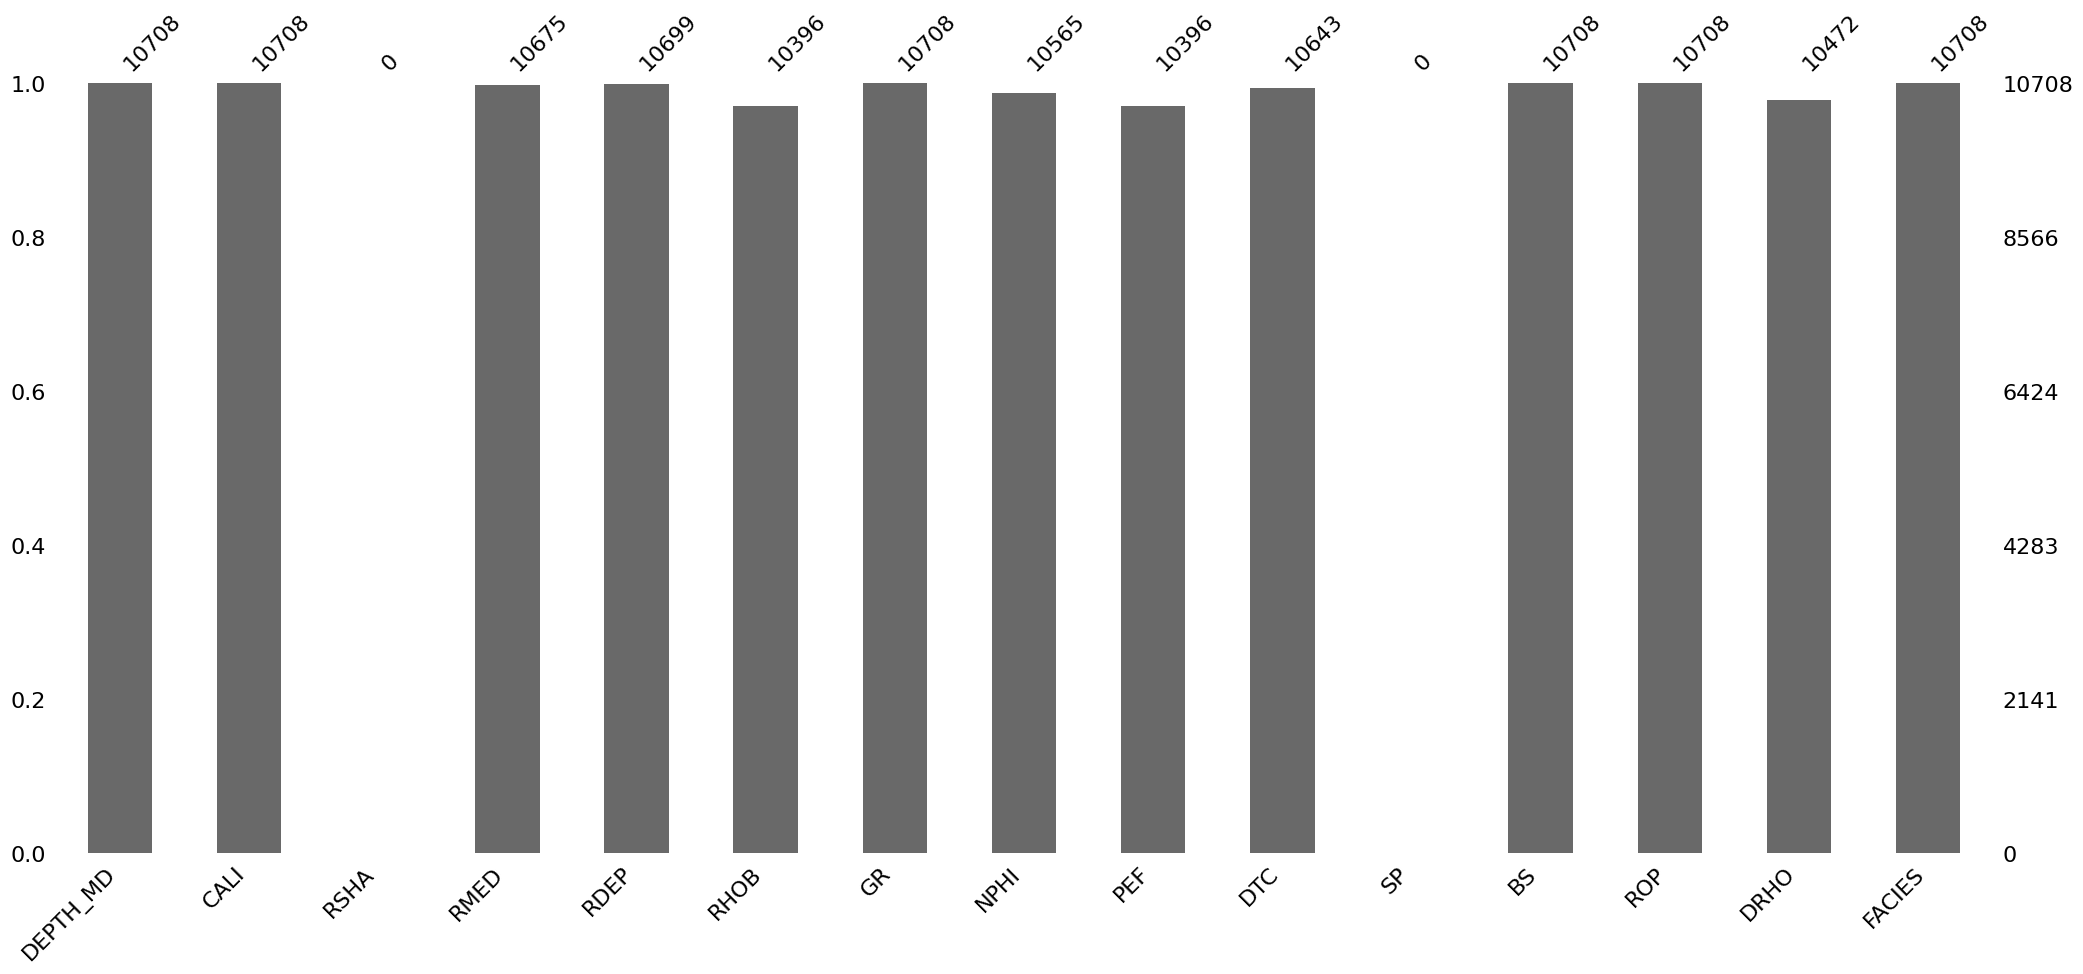

In [55]:
import missingno as msno
msno.bar(train_data)

In [56]:
train_data = train_data.drop(["ROP","BS",'RSHA',"SP"],axis=1)

In [57]:
train_data.dropna(inplace=True)
train_data

,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,DRHO,FACIES
130,754.179199,12.521476,1.412026,1.315972,2.079341,115.562035,0.495291,5.906584,143.338440,0.032364,1
131,754.331200,12.630612,1.398117,1.315344,2.077192,113.619270,0.501820,6.384551,143.411118,0.039953,1
132,754.483199,12.726549,1.394453,1.323453,2.076251,116.701439,0.522005,7.069182,143.314133,0.054563,1
133,754.635199,12.860774,1.415387,1.336856,2.078405,118.532913,0.546147,7.836967,143.667496,0.072767,1
134,754.787200,12.904781,1.389204,1.309308,2.079669,119.113991,0.558983,7.969746,145.145447,0.074599,1
...,...,...,...,...,...,...,...,...,...,...,...
10638,2351.395200,8.495781,2.419575,2.432598,2.446120,83.710793,0.206534,3.299096,81.848648,0.011542,3
10639,2351.547200,8.501786,2.298789,2.297934,2.444777,85.365189,0.198399,3.322829,91.259453,0.016520,3
10640,2351.699200,8.514043,2.244636,2.242675,2.433254,84.372864,0.206373,3.293875,94.804581,0.023240,3
10641,2351.851200,8.496308,2.178133,2.187869,2.415897,79.731628,0.199548,3.156241,93.250061,0.024025,2


<Axes: >

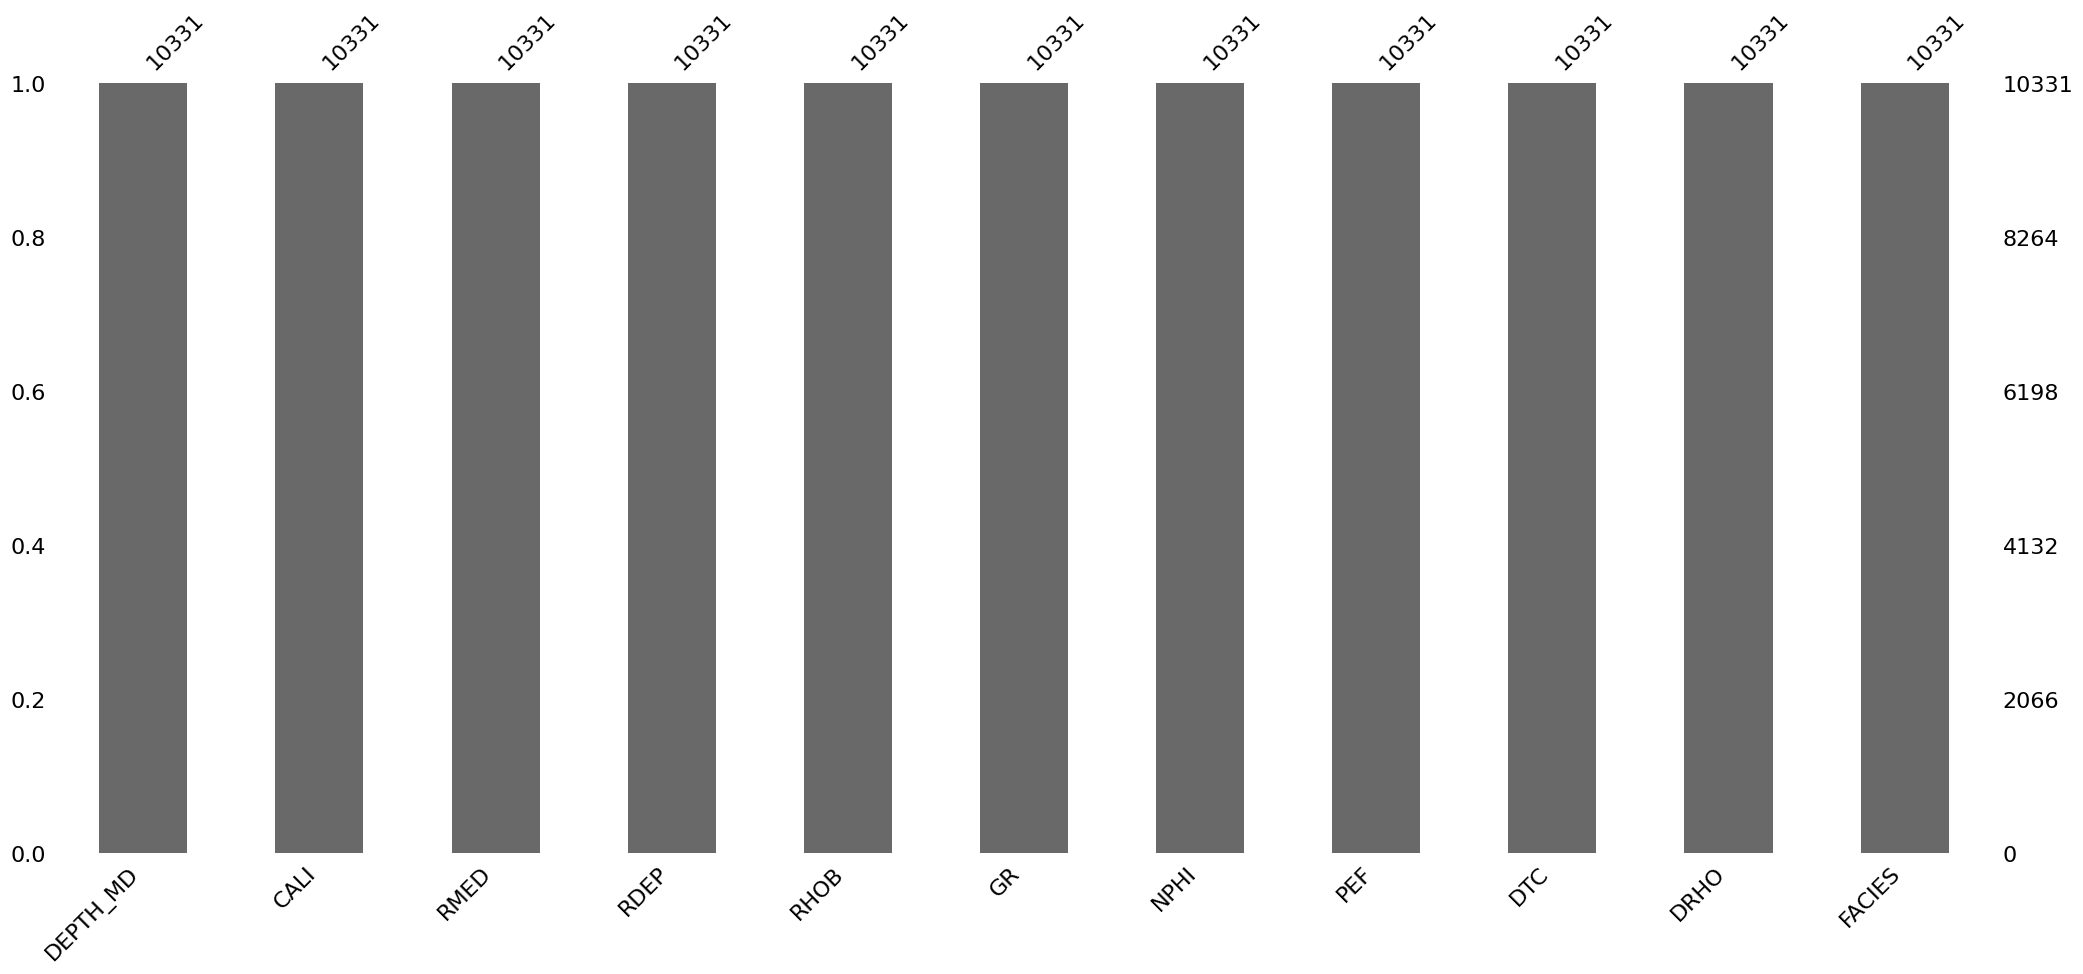

In [58]:
msno.bar(train_data)

# K Nearest Neighbor Algorithm

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [60]:
#Pilih input dan target
X = train_data[["RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC"]]
y = train_data["FACIES"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KNN model

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
y_pred = knn.predict(X_test)

### Evaluation model

In [65]:
#accuracy report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9070967741935484


In [66]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96      1532
           2       0.90      0.90      0.90       567
           3       0.47      0.37      0.42       147
           4       0.92      0.96      0.94       504
           5       0.74      0.58      0.65        48
           6       0.85      0.80      0.82       302

    accuracy                           0.91      3100
   macro avg       0.81      0.77      0.78      3100
weighted avg       0.90      0.91      0.90      3100



In [67]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1492    5   21    0    5    9]
 [  16  512   21    6    2   10]
 [  47   29   55    0    1   15]
 [   3    6    2  483    2    8]
 [   7    5    4    2   28    2]
 [   2    9   13   36    0  242]]


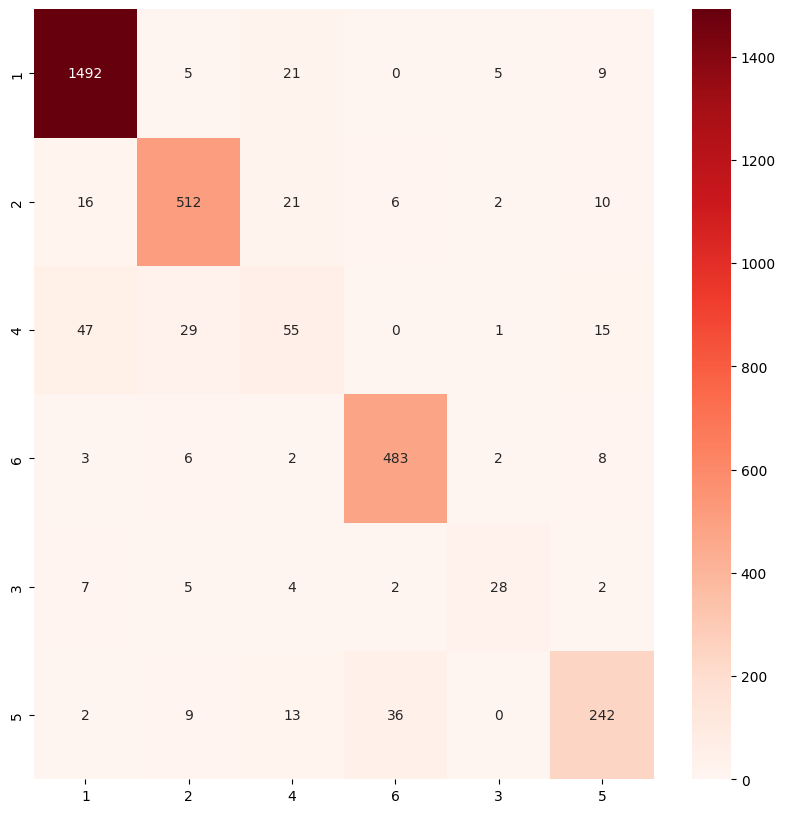

In [68]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap="Reds", fmt=".0f",
                 xticklabels=labels,
                 yticklabels=labels)

### Implementation model using blind dataset

In [69]:
test_data = pd.read_csv("Well B.csv")

In [70]:
# Contoh pembersihan dan persiapan data pada dataset baru
test_data = test_data.drop(["ROP","BS",'RSHA',"SP"], axis=1)
test_data.dropna(inplace=True)


In [71]:
# Pilih fitur pada dataset baru yang sesuai dengan fitur pada dataset pelatihan
X_test_new = test_data[["RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC"]]

# Lakukan prediksi menggunakan model
y_pred_new = knn.predict(X_test_new)

# Menyertakan label sebenarnya dari dataset baru
true_labels_new = test_data["FACIES"]

Accuracy on new dataset: 0.7756356815339724
              precision    recall  f1-score   support

           1       0.88      0.96      0.92      5670
           2       0.54      0.49      0.51      1237
           3       0.20      0.47      0.28       264
           4       0.85      0.57      0.68      1277
           5       0.45      0.52      0.48       168
           6       0.70      0.48      0.57       905
           7       0.00      0.00      0.00        75

    accuracy                           0.78      9596
   macro avg       0.52      0.50      0.49      9596
weighted avg       0.79      0.78      0.77      9596

[[5466   30  156    0    8   10    0]
 [ 331  609  233    2    5   57    0]
 [ 108   32  124    0    0    0    0]
 [  48  332   57  722    3  115    0]
 [  22   48    7    3   87    1    0]
 [ 202   58   51   68   91  435    0]
 [   0   24    0   51    0    0    0]]


c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


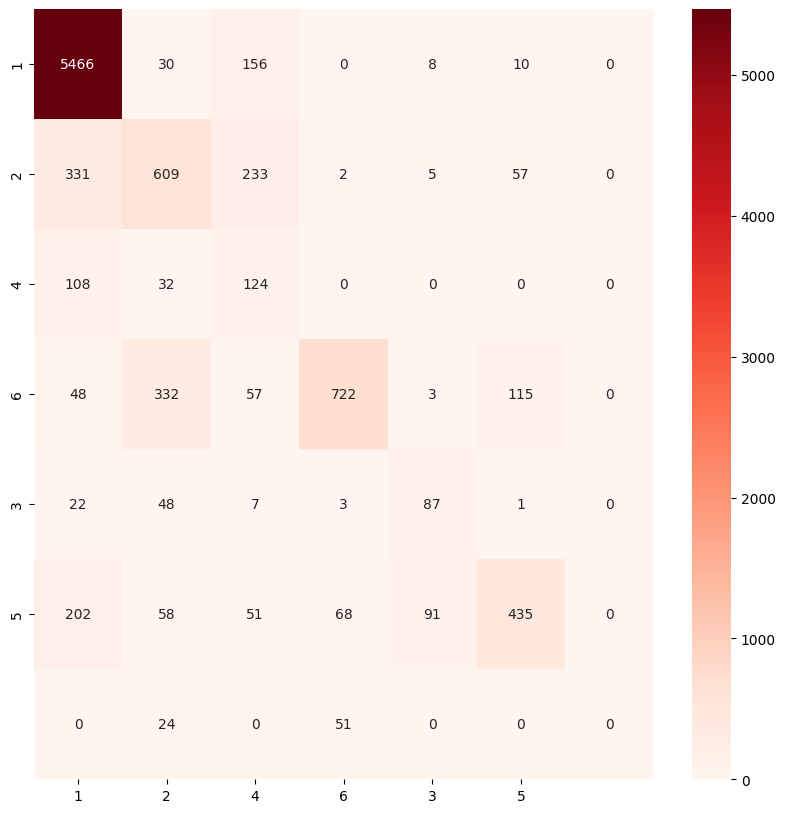

In [72]:
# Accuracy report pada dataset baru
accuracy_new = accuracy_score(true_labels_new, y_pred_new)
print(f"Accuracy on new dataset: {accuracy_new}")

# Classification report pada dataset baru
print(classification_report(true_labels_new, y_pred_new))

# Confusion matrix pada dataset baru
cf_matrix_new = confusion_matrix(true_labels_new, y_pred_new)
print(cf_matrix_new)

# Visualisasi confusion matrix pada dataset baru
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix_new, annot=True, cmap="Reds", fmt=".0f",
                 xticklabels=labels, yticklabels=labels)

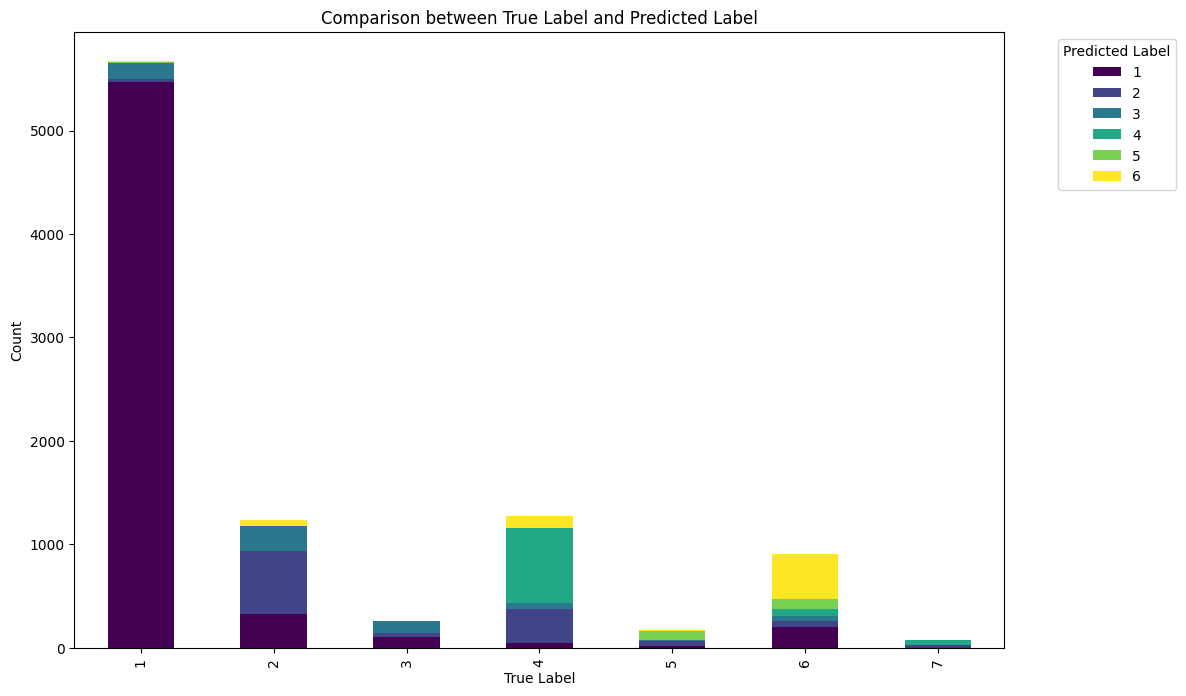

In [73]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat DataFrame baru untuk membandingkan true label dan predicted label
comparison_df = pd.DataFrame({'True Label': true_labels_new, 'Predicted Label': y_pred_new})

# Menghitung frekuensi masing-masing label
label_counts = comparison_df.groupby(['True Label', 'Predicted Label']).size().unstack(fill_value=0)

# Plot bar untuk membandingkan true label dan predicted label
label_counts.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')
plt.title('Comparison between True Label and Predicted Label')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.legend(title='Predicted Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

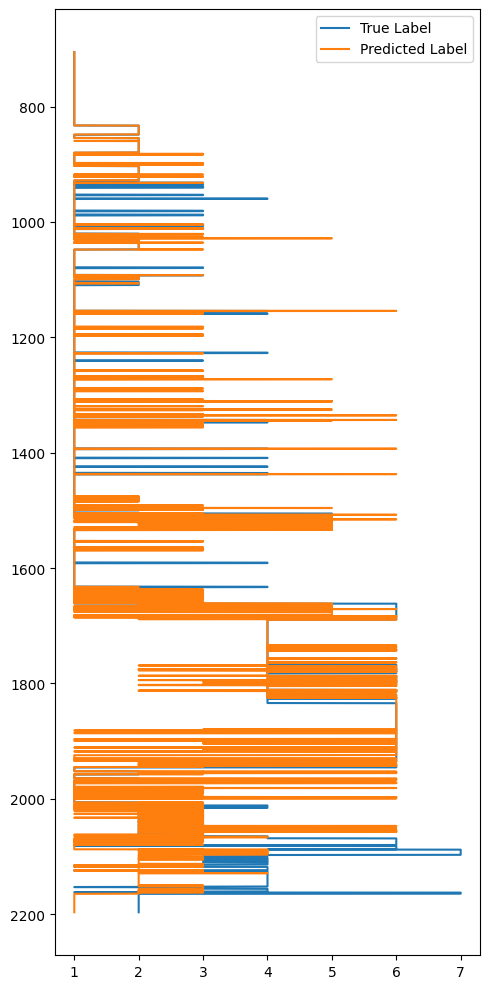

In [74]:
figure, ax = plt.subplots(figsize=(5,10))
logs = test_data.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_pred_new, logs.DEPTH_MD, label='Predicted Label')
ax.invert_yaxis()
# ax.set_xlabel(features[i])
plt.tight_layout()
plt.legend()